<p style="font-size:2.75em; color:purple" >
   Mini Project: Movies Analisis
</p>
<p style="font-size:1.75em; color:grey" > Leandro Vieira</p>

<p style="font-size:2.3em; color:purple" >
   DataSet
</p>

O dataset utilizado contem dados sobre a industria cinematografica dos ultimos 30 anos, com dados coletados do site [IMDB](https://www.imdb.com/) - Por Daniel Grijalva 
<br><br>
DataSet retirado de:<br> 
https://www.kaggle.com/danielgrijalvas/movies


<p style="font-size:2.3em; color:purple" >
   Motivação
</p>

Validar meus conhecimentos adquiridos nos cursos de Data Science, alem de explorar informações sobre o mercado cinematografico e descobrir as pricipais estatisticas e curiosidades sobre este mercado, tais como:.<br>
* Qual genero de filme contem as melhores avaliações?
* Qual o diretor de maior sucesso?
* Como o orçamento para os filmes evoluiu ao longo dos ultimos 30 anos?

Este dataset consiste de:<br/>
* budget: the budget of a movie. Some movies don't have this, so it appears as 0
* company: the production company
* country: country of origin
* director: the director
* genre: main genre of the movie.
* gross: revenue of the movie
* name: name of the movie
* rating: rating of the movie (R, PG, etc.)
* released: release date (YYYY-MM-DD)
* runtime: duration of the movie
* score: IMDb user rating
* votes: number of user votes
* star: main actor/actress
* writer: writer of the movie
* year: year of release

In [309]:
#Importando as bibliotecas

%autosave 120
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Autosaving every 120 seconds


In [310]:
#Lendo o dataset
data = pd.read_csv('./Data/movies.csv', encoding = "utf-8")
#data.describe()

In [311]:
#Cleaning

#data.dtypes
del data['rating']
del data['released']
#data.head()

In [312]:
#data.isnull().any()

<p style="font-size:2.3em; color:purple" >
   Filmes com maiores avaliações
</p>

In [313]:
#Add um estilo para os graficos plotados
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [314]:
#Distribuição das avaliações dos filmes

# fig, ax = plt.subplots(figsize=(15,10))

# plt.xlabel('Avaliações IMDB')
# plt.title('Distruibuição das avaliações')
# data['score'].plot.hist(bins=20, edgecolor='black')

# plt.show()

/home/leandro/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


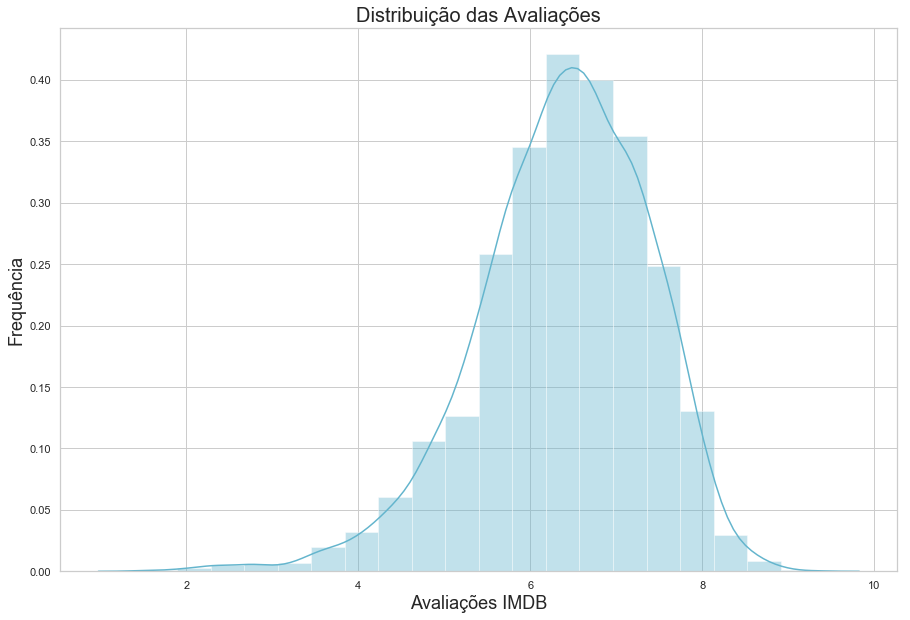

In [315]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(data['score'], color='c', bins=20)
ax.set_xlabel('Avaliações IMDB', fontsize=18)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição das Avaliações', fontsize=20)
plt.show()

In [316]:
#Criando uma mascara para filtrar os dados desejados para o plot

filtro = data[['score', 'name']]
mask = filtro['score'] > 8.0

data_score = filtro[mask]
data_score_sorted = data_score.sort_values(by='score', ascending=False)

x = data_score_sorted['name'][:10]
y = data_score_sorted['score'][:10]

# fig, ax = plt.subplots(figsize=(15,10))

# plt.barh(x,y, edgecolor='black', height=0.5)
# plt.xlabel('Avaliações IMDB')
# plt.title('Filmes com as maiores avaliações')

# plt.show()

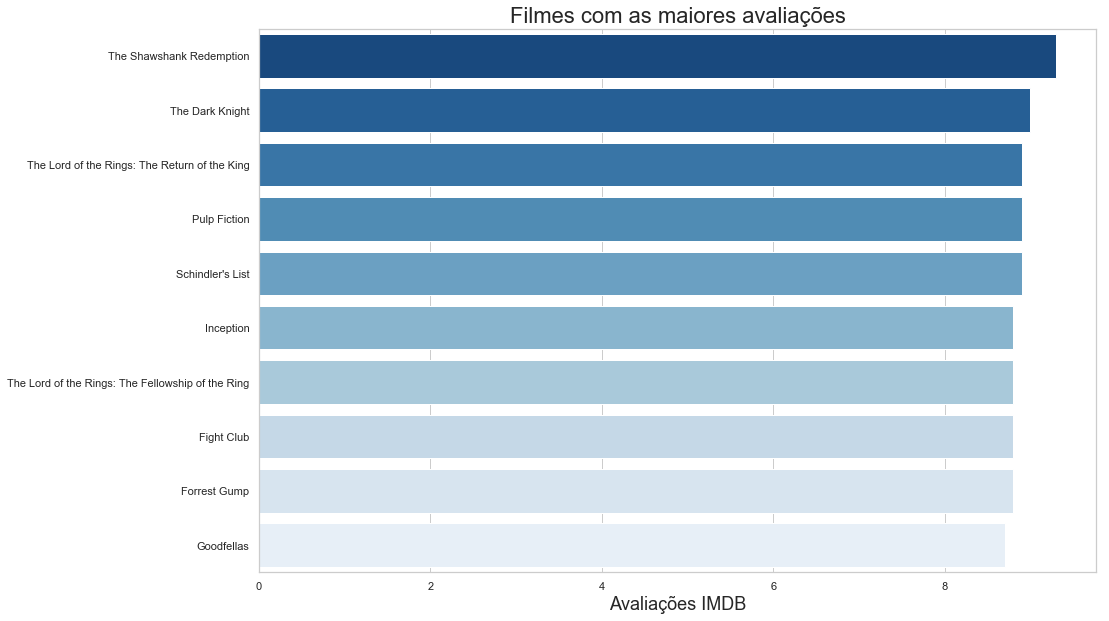

In [317]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

plt.title('Filmes com as maiores avaliações', fontsize=22)
sns.barplot(x=y, y=x, palette='Blues_r', ax=ax)
ax.set_xlabel("Avaliações IMDB", fontsize=18)
ax.set_ylabel('')
plt.show()

In [318]:
#Filme com a melhor avaliação
x = data['name'].str.contains('The Shawshank Redemption')
data[x]

,budget,company,country,director,genre,gross,name,runtime,score,star,votes,writer,year
1760,25000000.0,Castle Rock Entertainment,USA,Frank Darabont,Crime,28341469.0,The Shawshank Redemption,142,9.3,Tim Robbins,1861666,Stephen King,1994


<p style="font-size:2.3em; color:purple" >
   Distribuição das Avaliações
</p>

In [319]:
#Distribuição das avaliações

# plt.figure(figsize=(15,10))

# plt.boxplot(data['score'])

# plt.show()

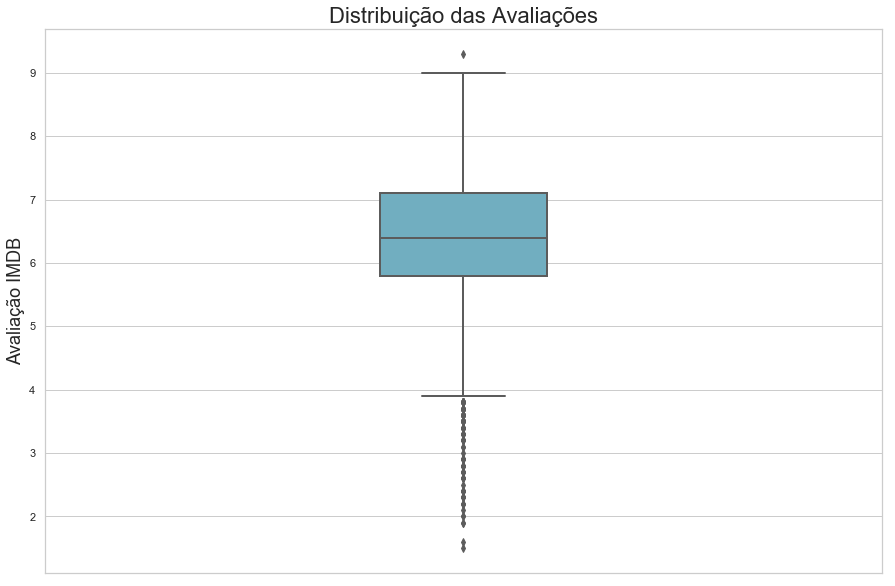

In [320]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(y=data['score'], color='c', linewidth=2, width=.2)
plt.title('Distribuição das Avaliações', fontsize=22)
ax.set_ylabel("Avaliação IMDB", fontsize=18)

plt.show()

<p style="font-size:2.3em; color:purple" >
   Como as avaliações se distribuem com o passar dos anos?
</p>

In [321]:
#Plot

# fig, ax = plt.subplots(figsize=(15,10))

# plt.bar(data['year'].values, data['score'].values)
# plt.xlabel('Anos')
# plt.ylabel('Avaliações IMDB')
# plt.title('Avaliação por ano')

# plt.show()

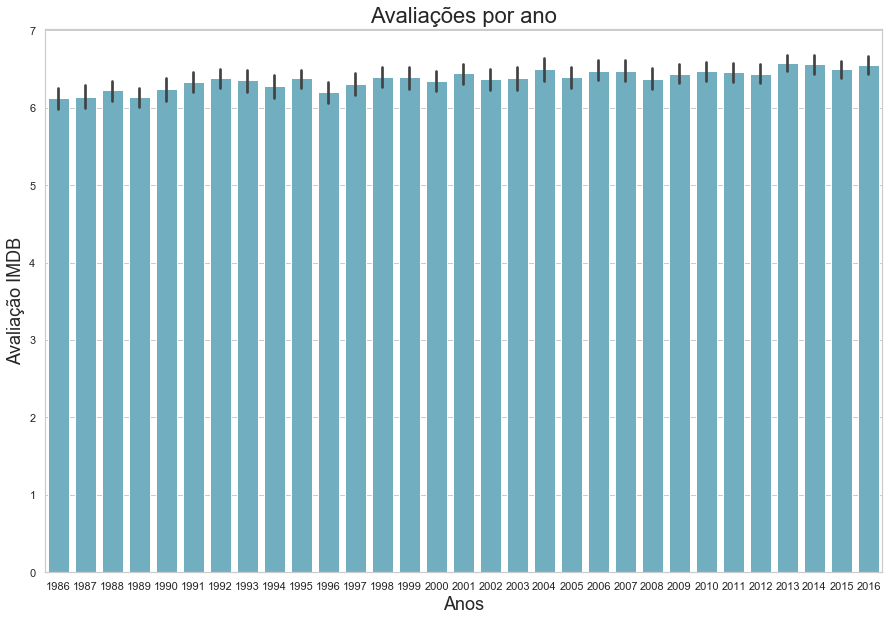

In [322]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

plt.title('Avaliações por ano', fontsize=22)
sns.barplot(x=data['year'].values, y=data['score'].values, color='c', ax=ax)
ax.set_xlabel('Anos', fontsize=18)
ax.set_ylabel('Avaliação IMDB', fontsize=18)

plt.show()

<p style="font-size:2.3em; color:purple" >
   Há relação entre a avaliação do filme e sua duração?
</p>

In [323]:
#Plot

# plt.figure(figsize=(15,10))

# plt.scatter(data['score'].values, data['runtime'].values, s=10)
# plt.xlabel('Avaliações IMDB')
# plt.ylabel('Orçamento (milhões USD)')
# plt.title('Avaliação vs Duração')

# plt.show()

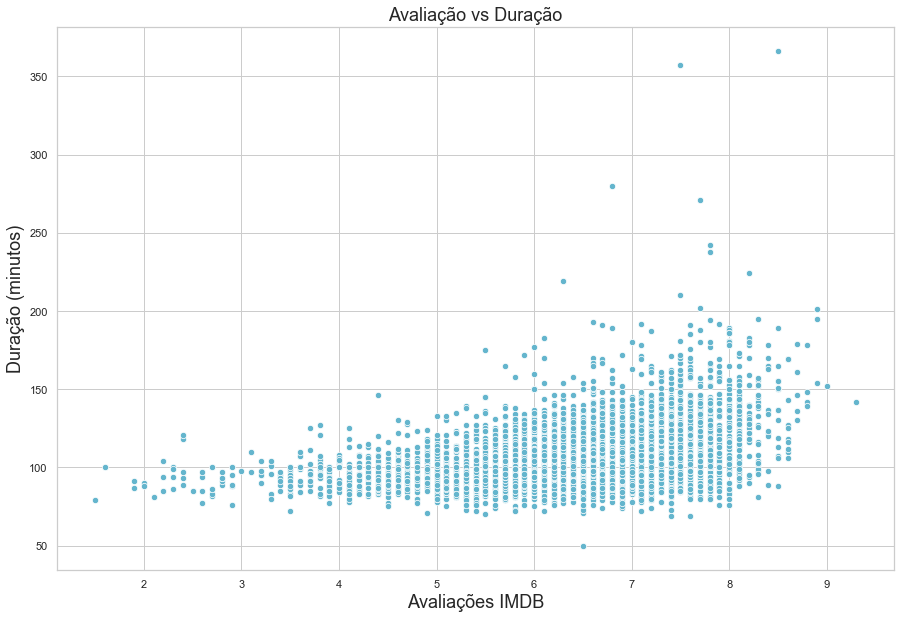

In [324]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(x=data['score'].values, y=data['runtime'].values, color='c', s=40)
ax.set_xlabel('Avaliações IMDB', fontsize=18)
ax.set_ylabel('Duração (minutos)', fontsize=18)
ax.set_title('Avaliação vs Duração', fontsize=18)

plt.show()

In [325]:
#Correlação entre avaliação e duração
x = data[['score', 'runtime']]
x.corr()

,score,runtime
score,1.000000,0.395343
runtime,0.395343,1.000000


~39,5% Pouco correlacionado

<p style="font-size:2.3em; color:purple" >
   Há relação entre avaliação do filme e seu custo?
</p>

In [326]:
#Plot
# plt.figure(figsize=(15,10))

# plt.scatter(data['score'].values, data['budget'].values, s=10)
# plt.xlabel('Avaliações IMDB')
# plt.ylabel('Orçamento (milhões USD)')
# plt.title('Avaliação vs Orçamento')

# plt.show()

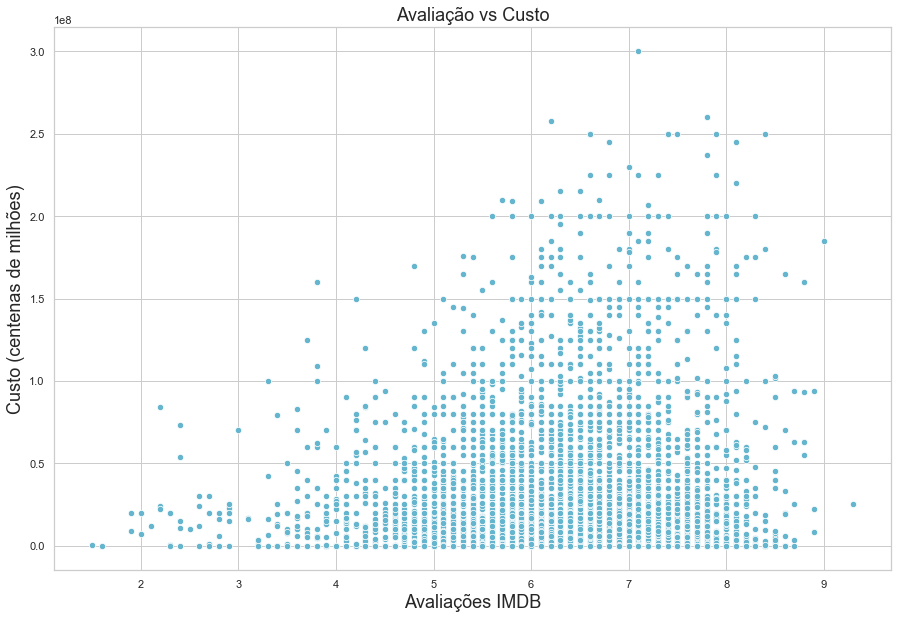

In [327]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(x=data['score'].values, y=data['budget'].values, color='c', s=40)
ax.set_xlabel('Avaliações IMDB', fontsize=18)
ax.set_ylabel('Custo (centenas de milhões)', fontsize=18)
ax.set_title('Avaliação vs Custo', fontsize=18)

plt.show()

In [328]:
#Correlação entre avaliação e orçamento
x = data[['score', 'budget']]
x.corr()

,score,budget
score,1.000000,0.042145
budget,0.042145,1.000000


~4% Pouco correlacionado

<p style="font-size:2.3em; color:purple" >
   Há relação da avaliação com a receita do filme?
</p>

In [329]:
#Plot
# plt.figure(figsize=(15,10))

# plt.scatter(data['score'].values, data['gross'].values, s=10)
# plt.xlabel('Avaliações IMDB')
# plt.ylabel('Lucro (milhões USD)')
# plt.title('Avaliação vs Lucro')

# plt.show()

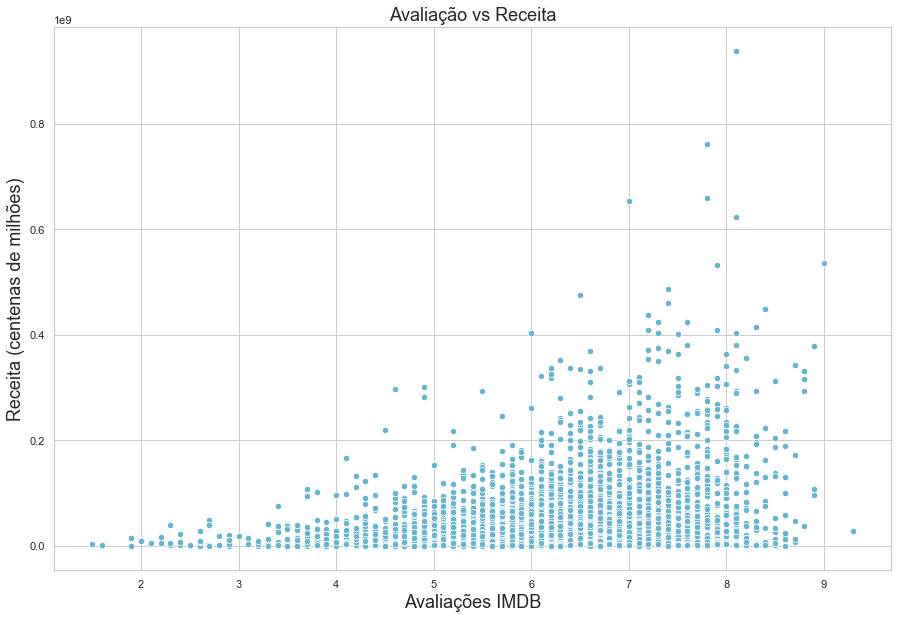

In [330]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(x=data['score'].values, y=data['gross'].values, color='c', s=40)
ax.set_xlabel('Avaliações IMDB', fontsize=18)
ax.set_ylabel('Receita (centenas de milhões)', fontsize=18)
ax.set_title('Avaliação vs Receita', fontsize=18)

plt.show()

In [331]:
#Correlação entreavaliação e lucro
x = data[['score', 'gross']]
x.corr()

,score,gross
score,1.000000,0.165693
gross,0.165693,1.000000


~16% Pouco correlacionado

<p style="font-size:2.3em; color:purple" >
  Generos com as melhores avaliações
</p>

In [332]:
#Gerando um dataframe separado apenas as colunas de interesse

rating_genre = data[['genre', 'score']]
rating_genre.head()

,genre,score
0,Adventure,8.1
1,Comedy,7.8
2,Action,6.9
3,Action,8.4
4,Adventure,6.9


In [333]:
#rating_genre['genre'].value_counts()

In [334]:
#Quantidade de filmes por genero

# fig, ax = plt.subplots(figsize=(15,10))

# ax.barh(rating_genre['genre'].unique(), rating_genre['genre'].value_counts(), edgecolor='black')
# plt.xlabel('Quantidade de Filmes')
# plt.title('Filmes por genero')

# plt.show()

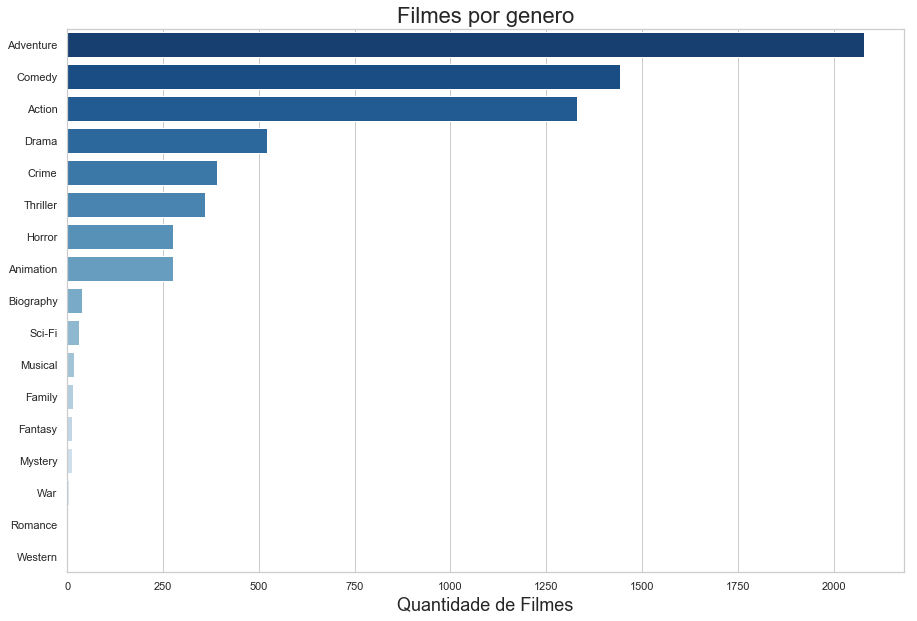

In [335]:
#Seaborn

fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(x=rating_genre['genre'].value_counts(), y=rating_genre['genre'].unique(), palette='Blues_r', ax=ax)
ax.set_xlabel('Quantidade de Filmes', fontsize=18)
ax.set_ylabel('')
plt.title('Filmes por genero', fontsize=22)
plt.show()

In [336]:
#Genero com as melhores avaliações
genres = data['genre'].unique()
genres_count = []

In [337]:
#Criando um filtro para extrair a media referente a cada genero(unico)
for i in range(len(genres)):
    mask = data['genre'].str.contains(genres[i])
    filtro = data[mask]
    genres_count.append(filtro['score'].mean())

In [338]:
#genres_count

In [339]:
#print(data['score'].mean())
genres_plot = pd.DataFrame()

In [340]:
genres_plot['genres'] = genres
genres_plot['genres_count'] = genres_count
genres_plot = genres_plot.sort_values(by='genres_count', ascending=False)
genres_plot.head()

,genres,genres_count
8,Biography,7.040390
4,Crime,6.756322
7,Animation,6.746931
3,Drama,6.715720
10,Musical,6.650000


In [341]:
#Plot
# fig, ax=plt.subplots(figsize=(15,10))
# z = data['score'].mean()

# ax.barh(genres_plot['genres'].sort_values(), genres_plot['genres_count'], edgecolor='black')
# ax.axvline(z,color='blue', alpha=.8, label='Media')
# plt.xlabel('Avaliações IMDB')
# plt.title('Média das Avaliações por genero')

# plt.legend()
# plt.show()

___Nota:___ __Matplotlib__ _plota o eixo y em ordem decrescente, enquanto __Seaborn__ plota em ordem crescente_

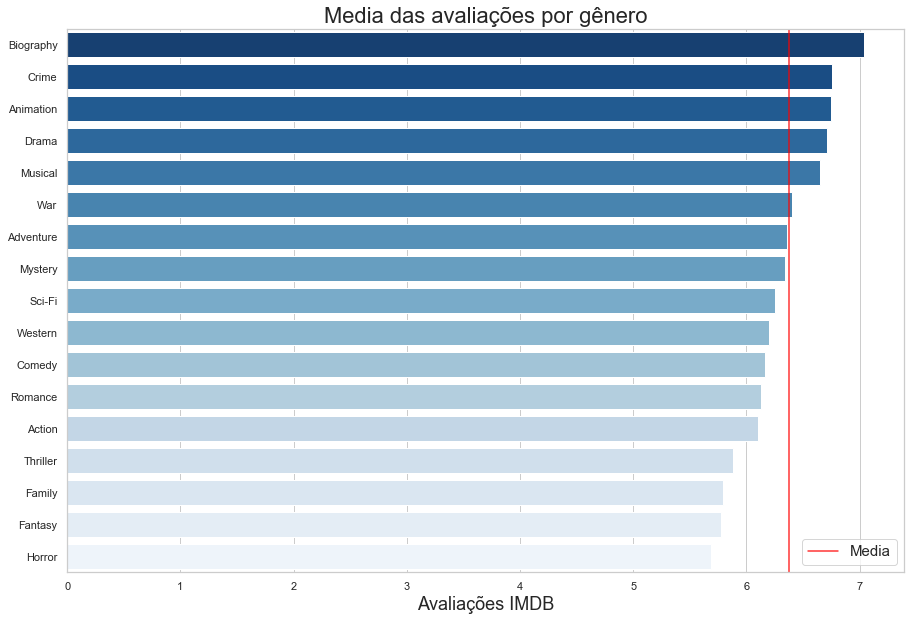

In [342]:
fig, ax = plt.subplots(figsize=(15,10))
z = data['score'].mean()

sns.barplot(x=genres_plot['genres_count'], y=genres_plot['genres'], palette='Blues_r', ax=ax)
ax.axvline(z,color='red', alpha=.8, label='Media')
ax.set_xlabel('Avaliações IMDB', fontsize=18)
ax.set_ylabel('')
plt.title('Media das avaliações por gênero', fontsize=22)

plt.legend(fontsize=15)
plt.show()

<p style="font-size:2.3em; color:purple" >
  Curiosidades sobre Stephen King
</p>

In [343]:
#Quantos filmes escreveu?
mask = data['writer'].str.contains('Stephen King')
movies_SK = data[mask]
len(movies_SK)

22

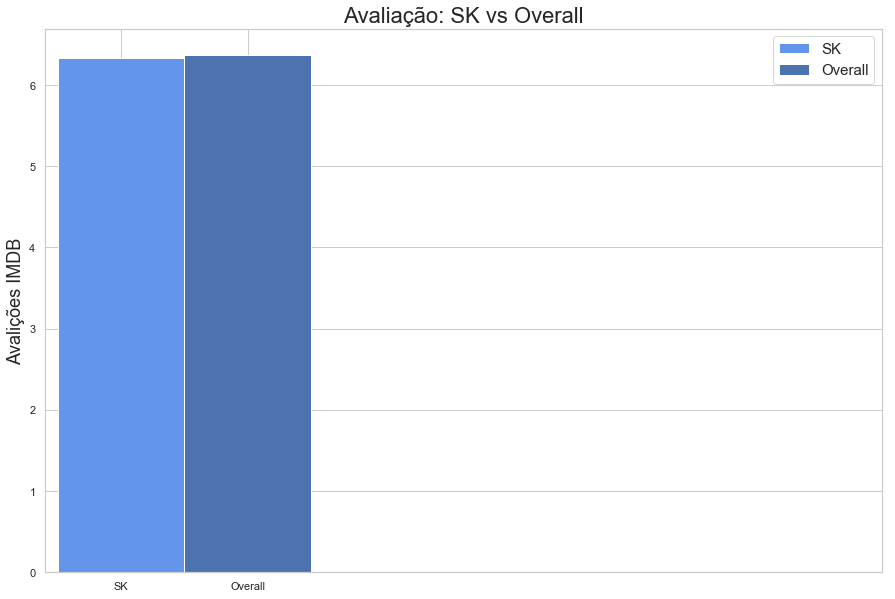

In [344]:
#Média das notas de seus filmes com relação as media total

#Extraindo as medias
rating_SK = movies_SK['score'].mean()
rating_Overall = data['score'].mean()

#Plot
plt.figure(figsize=(15,10))
labels=['SK', 'Overall']
barwidth =.2

#Medidas para o tamanho e posição das barras
r1 = 1
r2 = r1 + barwidth
r3 = r1 + 6*barwidth #Deixa as barras "unidas"

plt.bar(r1, rating_SK, width=barwidth, label='SK', color='cornflowerblue')
plt.bar(r2, rating_Overall, width=barwidth, label='Overall')

plt.xticks([r1,r2, r3], ['SK', 'Overall'])
plt.ylabel('Avalições IMDB', fontsize=18)
plt.title('Avaliação: SK vs Overall', fontsize=22)

plt.legend(fontsize=15)
plt.show()

In [345]:
#Avaliação dos filmes do SK com relação a media geral
# fig, ax = plt.subplots(figsize=(15,10))

# #Eixos
# z = data['score'].mean()
# x = movies_SK['name']
# y = movies_SK['score']

# ax.barh(x,y, edgecolor='black')
# ax.axvline(z,color='blue', alpha=.8, label='Media Geral')
# ax.set_title('Avaliação dos filmes do SK')
# ax.set_xlabel('Avalições IMDB')

# #Anotação para indicar que SK detem o filme melhor avaliado dos ultimos 30 anos
# plt.annotate('Best Movie',fontsize=13, xy=(8.5, 11.8), xytext=(8.9, 14), 
#              arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3', 
#                              color='black')
#             )

# plt.legend(fontsize=15)
# plt.show()

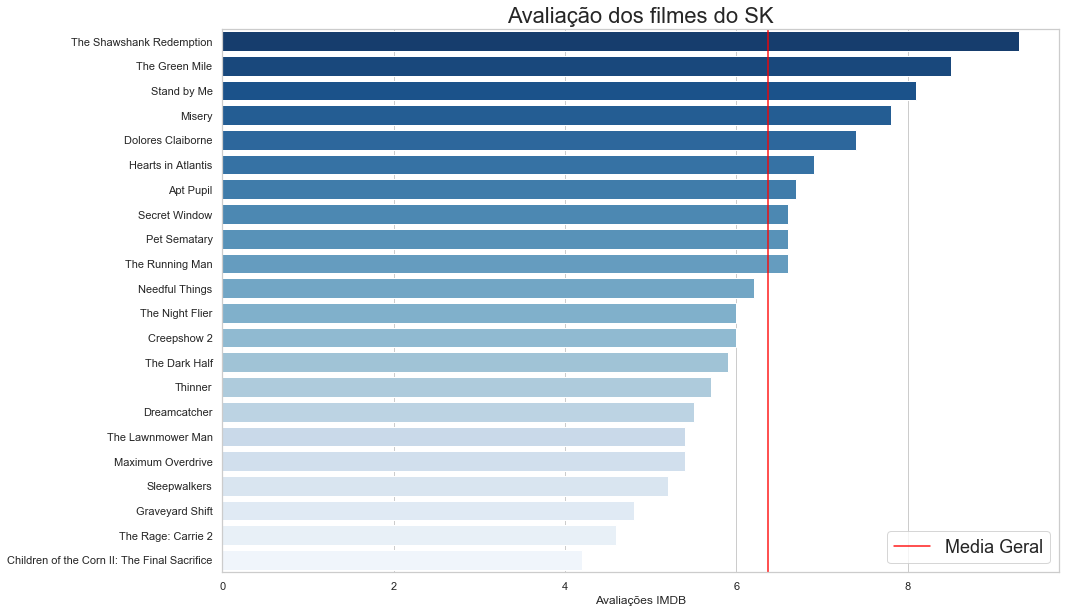

In [363]:
#Seaborn

new_movies_sk = movies_SK[['name', 'score']]
new_movies_sk = new_movies_sk.sort_values(by='score', ascending=False)
#new_movies_sk

fig, ax = plt.subplots(figsize=(15,10))
z = data['score'].mean()
x = new_movies_sk['name']
y = new_movies_sk['score']

sns.barplot(x=y, y=x, palette='Blues_r')
ax.axvline(z,color='red', alpha=.9, label='Media Geral')
ax.set_title('Avaliação dos filmes do SK', fontsize=22)
ax.set_xlabel('Avaliações IMDB')
ax.set_ylabel('')

plt.legend(fontsize=18)
plt.show()

<p style="font-size:2.3em; color:purple" >
  Diretores de maior sucesso
</p>

In [347]:
#Diretores com mais filmes dirigidos nos ultimos 30 anos
director_movies = data[['director', 'name', 'score']]

#director_movies.head()
#director_movies['director'].value_counts()

director_more_movies = ['Woody Allen','Clint Eastwood','Steven Spielberg','Steven Soderbergh','Ron Howard',
                       'Ridley Scott','Joel Schumacher','Barry Levinson','Spike Lee','Tim Burton']
director_qtd_movies = [33,24,21,21,20,19,19,18,18,17]

In [348]:
#Filtro para extrair a qtd de filme dos maiores diretores
director_count = []
for i in range(len(director_more_movies)):
    mask = director_movies['director'].str.contains(director_more_movies[i])
    filtro = director_movies[mask]
    director_count.append(filtro['score'].mean())

In [349]:
#director_count
#director_movies['director'].value_counts()[:10]

In [350]:
#Maiores diretores e suas medias das avaliações
# fig, ax=plt.subplots(figsize=(15,10))


# ax.barh(director_more_movies, director_count, edgecolor='black')
# plt.xlabel('Avaliações IMDB')
# plt.title('Maiores diretores e suas avaliações (medias)')

# #Anotações manuais da qtd de filme por diretor(Deve haver um maneira mais eficiente de fazer isso!)
# plt.annotate('33', xy=(6.75, 0.001), fontsize=18)
# plt.annotate('24', xy=(6.9, 1), fontsize=18)
# plt.annotate('21', xy=(7.15, 2), fontsize=18)
# plt.annotate('21', xy=(6.45, 3), fontsize=18)
# plt.annotate('20', xy=(6.6, 4), fontsize=18)
# plt.annotate('19', xy=(6.65, 5), fontsize=18)
# plt.annotate('19', xy=(6.1, 6), fontsize=18)
# plt.annotate('18', xy=(6.1, 7), fontsize=18)
# plt.annotate('18', xy=(6.3, 8), fontsize=18)
# plt.annotate('17', xy=(6.8, 9), fontsize=18)

# textstr = 'Nº Filmes'
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax.text(0.91,0.99, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

# plt.show()

In [351]:
df = pd.DataFrame()
df['Num Filmes'] = director_count
df['Filmes por diretor'] = director_more_movies
df_sorted = df.sort_values(by='Num Filmes', ascending=False)

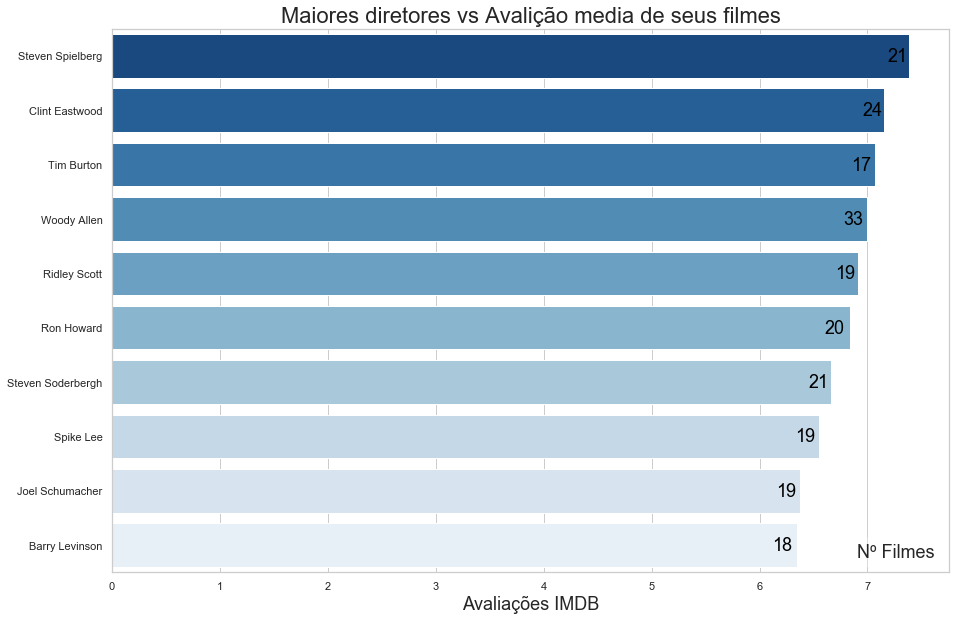

In [352]:
#Seaborn

fig, ax=plt.subplots(figsize=(15,10))

sns.barplot(x=df_sorted['Num Filmes'], y=df_sorted['Filmes por diretor'], palette='Blues_r')
ax.set_title('Maiores diretores vs Avalição media de seus filmes', fontsize=22)
ax.set_xlabel('Avaliações IMDB', fontsize=18)
ax.set_ylabel('')

plt.annotate('21', xy=(7.19, 0.1), fontsize=18, color='black')
plt.annotate('24', xy=(6.95, 1.1), fontsize=18, color='black')
plt.annotate('17', xy=(6.85, 2.1), fontsize=18, color='black')
plt.annotate('33', xy=(6.78, 3.1), fontsize=18, color='black')
plt.annotate('19', xy=(6.7, 4.1), fontsize=18, color='black')
plt.annotate('20', xy=(6.6, 5.1), fontsize=18, color='black')
plt.annotate('21', xy=(6.45, 6.1), fontsize=18, color='black')
plt.annotate('19', xy=(6.33, 7.1), fontsize=18, color='black')
plt.annotate('19', xy=(6.15, 8.1), fontsize=18, color='black')
plt.annotate('18', xy=(6.12, 9.1), fontsize=18, color='black')

textstr = 'Nº Filmes'
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
ax.text(0.89,0.02, textstr, transform=ax.transAxes, fontsize=18, verticalalignment='bottom', bbox=props)

plt.show()

<p style="font-size:2.3em; color:purple" >
  Ator que mais fez filmes
</p>

In [353]:
data['star'].value_counts()[:5]

Nicolas Cage         42
Robert De Niro       38
Denzel Washington    36
Tom Hanks            35
Bruce Willis         33
Name: star, dtype: int64

___Nicolas Cage!!!!!!!___

<p style="font-size:2.3em; color:purple" >
  Evolução do orçamento e receita dos filmes ao longo dos anos
</p>

In [354]:
#Colocar isto no começo da apresentação

#Criando um novo dateframe com as colunas de interesse
evolution_budget = data[['budget', 'year']]
evolution_budget.head()

,budget,year
0,8000000.0,1986
1,6000000.0,1986
2,15000000.0,1986
3,18500000.0,1986
4,9000000.0,1986


In [355]:
#Criando indices para o plot

evolution_count = []
indices_years = evolution_budget['year'].unique()
#indices_years

In [356]:
#Criando um filtro para extrair a media do orçamento por ano
for i in range(len(indices_years)):
    mask = evolution_budget['year'].isin([indices_years[i]])
    filtro = evolution_budget[mask]
    evolution_count.append(filtro['budget'].mean())

In [357]:
#Criando um novo dateframe com as colunas de interesse
revenue_year = data[['gross', 'year']]
#revenue_year.head()

In [358]:
##Criando um filtro para extrair a media do lucro por ano

gross_count = []

for i in range(len(indices_years)):
    mask = evolution_budget['year'].isin([indices_years[i]])
    filtro = revenue_year[mask]
    gross_count.append(filtro['gross'].mean())

In [359]:
# lucro = []
# for i in range(len(evolution_count)):
#     lucro.append(gross_count[i] - evolution_count[i])

# #lucro

In [360]:
#Plot

# plt.figure(figsize=(15,10))
# plt.plot(indices_years, evolution_count, label='Orçamento')
# plt.plot(indices_years, gross_count, label='Receita')

# plt.xlabel('Year')
# plt.ylabel('Orçamento/Receita (centenas de milhões USD)')
# plt.title('Evolução do Orçamento/Receita')

# plt.legend(fontsize=15)
# plt.show()

In [361]:
df1 = pd.DataFrame()
df1['anos'] = indices_years
df1['custo'] = evolution_count
df1['receita'] = gross_count
#df1.head()

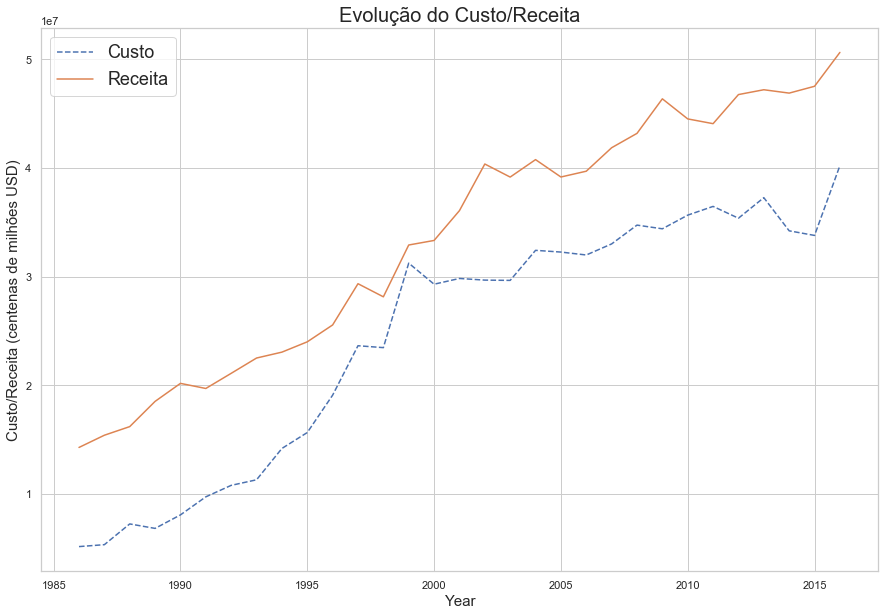

In [362]:
#Seaborn

fig, ax=plt.subplots(figsize=(15,10))

sns.lineplot(x='anos', y='custo', data=df1, label='Custo')
sns.lineplot(x='anos', y='receita', data=df1, label='Receita')

ax.set_title('Evolução do Custo/Receita', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Custo/Receita (centenas de milhões USD)', fontsize=15)
ax.lines[0].set_linestyle("--")

plt.legend(fontsize=18)
plt.show()